<a href="https://colab.research.google.com/github/thaiinaaalves/thaiinaaalves/blob/main/treino_globus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#conectando ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#localizando o df
#base está no link: https://docs.google.com/spreadsheets/d/1Tuub1uL99rDR9bRKQOdg8CjWyw6FrHpi/edit?usp=sharing&ouid=109425251032696452855&rtpof=true&sd=true
df=pd.read_excel('/content/drive/MyDrive/CASE WARREN/warren2.xlsx')

In [ ]:
#visuzalizando o df carregado
df

,Codigo Cliente,Categoria Cliente,Receita Trimestre Atual,Receita Trimestre Anterior,Produto
0,CLT00001,existente,5.110900e+02,4.952400e+02,A
1,CLT00002,novo,1.456167e+16,9.910000e+00,C
2,CLT00002,novo,2.084667e+16,1.231667e+16,A
3,CLT00002,novo,1.414000e+01,5.130000e+00,B
4,CLT00003,novo,1.114500e+02,6.972000e+01,A
...,...,...,...,...,...
6975,CLT04997,existente,4.911333e+15,3.467833e+15,C
6976,CLT04997,existente,3.660767e+16,2.866467e+15,B
6977,CLT04998,existente,6.130000e+02,6.813700e+02,A
6978,CLT04999,existente,1.480840e+03,1.162200e+03,B


In [ ]:
df['Receita Trimestre Anterior'].sum()

2.14033226335744e+19

In [ ]:
#verificando as colunas existentes
df.columns

Index(['Codigo Cliente', 'Categoria Cliente', 'Receita Trimestre Atual',
       'Receita Trimestre Anterior', 'Produto'],
      dtype='object')

In [ ]:
#extraindo informações sobre o df, quanntidade de clunas, se possuí valores nulos, e quais os tipos de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6980 entries, 0 to 6979
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Codigo Cliente              6980 non-null   object 
 1   Categoria Cliente           6980 non-null   object 
 2   Receita Trimestre Atual     6980 non-null   float64
 3   Receita Trimestre Anterior  6980 non-null   float64
 4   Produto                     6980 non-null   object 
dtypes: float64(2), object(3)
memory usage: 272.8+ KB
None


In [ ]:
#extraindo informações estatísticas sobre o df
df.describe()

,Receita Trimestre Atual,Receita Trimestre Anterior
count,6.980000e+03,6.980000e+03
mean,2.810523e+15,3.066379e+15
std,9.004308e+15,8.770409e+15
min,1.075000e+01,3.510000e+00
25%,1.925525e+02,6.540750e+01
50%,6.782500e+02,6.129700e+02
75%,1.034300e+05,3.822750e+04
max,6.387667e+16,7.806667e+16


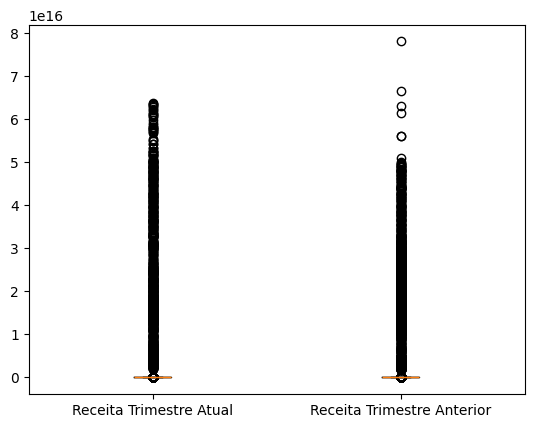

In [ ]:
#verificando a presença de outliers
plt.boxplot([df['Receita Trimestre Atual'], df['Receita Trimestre Anterior']])
plt.xticks([1, 2], ['Receita Trimestre Atual', 'Receita Trimestre Anterior']) #define rótulos do eixo x
plt.show()

In [ ]:
#criando uma coluna com o cálculo do percentual de crescimento
df['Crescimento']=(df['Receita Trimestre Atual'] - df['Receita Trimestre Anterior']) / df['Receita Trimestre Anterior'] * 100
df

,Codigo Cliente,Categoria Cliente,Receita Trimestre Atual,Receita Trimestre Anterior,Produto,Crescimento
0,CLT00001,existente,5.110900e+02,4.952400e+02,A,3.200468e+00
1,CLT00002,novo,1.456167e+16,9.910000e+00,C,1.469391e+17
2,CLT00002,novo,2.084667e+16,1.231667e+16,A,6.925575e+01
3,CLT00002,novo,1.414000e+01,5.130000e+00,B,1.756335e+02
4,CLT00003,novo,1.114500e+02,6.972000e+01,A,5.985370e+01
...,...,...,...,...,...,...
6975,CLT04997,existente,4.911333e+15,3.467833e+15,C,4.162541e+01
6976,CLT04997,existente,3.660767e+16,2.866467e+15,B,1.177101e+03
6977,CLT04998,existente,6.130000e+02,6.813700e+02,A,-1.003420e+01
6978,CLT04999,existente,1.480840e+03,1.162200e+03,B,2.741697e+01


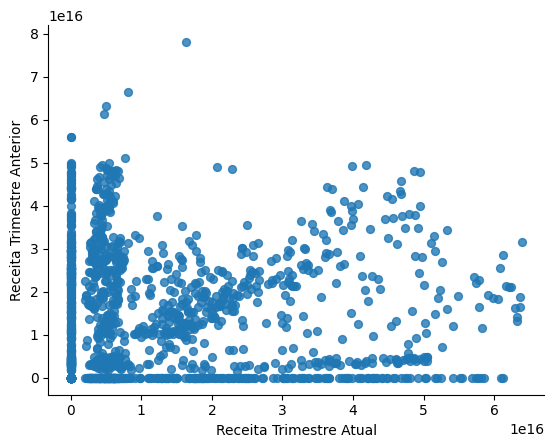

In [ ]:
#analisando a dispersão dos dados com relação as receitas anteriores e atuais
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Receita Trimestre Atual', y='Receita Trimestre Anterior', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#extraindo o valor da media por categoria para compreendermos a significancia do aumento
crescimento_por_categoria=df.groupby('Categoria Cliente')['Crescimento'].mean()
print(crescimento_por_categoria)

Categoria Cliente
existente    3.283519e+14
novo         5.224351e+15
Name: Crescimento, dtype: float64


In [ ]:
#analisando a média da variável crescimento x produto
crescimento_por_produto = df.groupby('Produto')['Crescimento'].mean()
print(crescimento_por_produto)

Produto
A    2.500659e+15
B    3.080225e+15
C    2.594810e+15
Name: Crescimento, dtype: float64


In [ ]:
#criando código para gerar respostas em relação ao crescimento médio da receita x cliente
#filtrando os dados para incluir apenas clientes existentes
clientes_existentes = df[df['Categoria Cliente'] == 'existente']

#calculando o crescimento médio da receita para clientes existentes
crescimento_medio_existentes = clientes_existentes['Crescimento'].mean()

#imprimindo o resultado
print(f'Crescimento médio da receita para clientes existentes: {crescimento_medio_existentes:.2f}%')

#verificando se o crescimento é positivo e significativo
if crescimento_medio_existentes > 0:
    print('O crescimento médio da receita dos clientes existentes é positivo.')
    if crescimento_medio_existentes > 10:  # Definir um limite para significância (ex: 10%)
        print('Este crescimento é considerado significativo, indicando que os clientes atuais estão gastando mais.')
    else:
        print('O crescimento é positivo, mas pode não ser considerado significativo.')
else:
    print('O crescimento médio da receita dos clientes existentes não é positivo.')


Crescimento médio da receita para clientes existentes: 328351928392795.19%
O crescimento médio da receita dos clientes existentes é positivo.
Este crescimento é considerado significativo, indicando que os clientes atuais estão gastando mais.


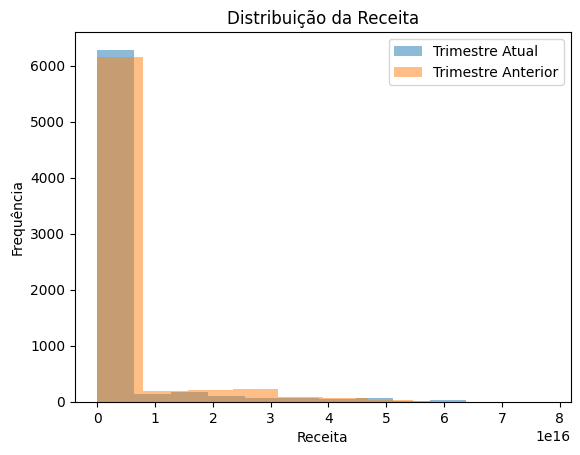

In [ ]:
#razão para a escolha do gráfico
#permite identificar a frequência de diferentes faixas de receita e comparar a distribuição entre os trimestres.
plt.hist(df['Receita Trimestre Atual'], bins=10, alpha=0.5, label='Trimestre Atual')
plt.hist(df['Receita Trimestre Anterior'], bins=10, alpha=0.5, label='Trimestre Anterior')
plt.legend(loc='upper right')
plt.xlabel('Receita')
plt.ylabel('Frequência')
plt.title('Distribuição da Receita')
plt.show()

In [ ]:
#criando código para gerar respostas em relação a quantidade de clientes novos x receita gerada pelos mesmos
#filtrando os dados para incluir apenas clientes novos
clientes_novos = df[df['Categoria Cliente'] == 'novo']

#Calculando a quantidade de clientes novos
qtd_clientes_novos = len(clientes_novos)

#Calculando a receita total gerada por clientes novos
receita_clientes_novos = clientes_novos['Receita Trimestre Atual'].sum()

#imprimindo os resultados
print(f"Quantidade de clientes novos: {qtd_clientes_novos}")
print(f"Receita total gerada por clientes novos: {receita_clientes_novos:.2f}")

Quantidade de clientes novos: 3415
Receita total gerada por clientes novos: 8414387333386379264.00


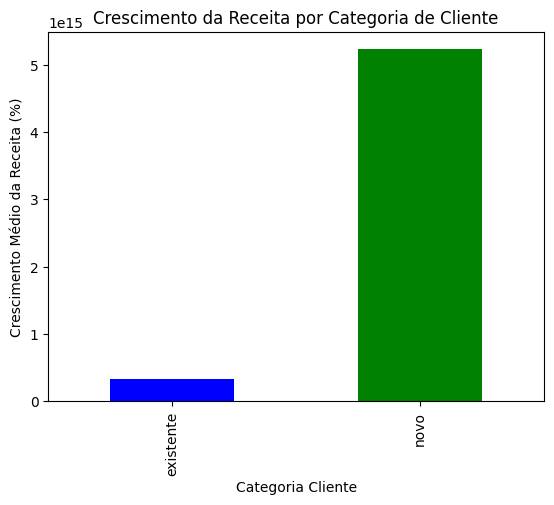

In [ ]:
#razão para a escolha do gráfico:
#facilita a visualização da diferença no crescimento entre as categorias de cliente.
crescimento_por_categoria = df.groupby('Categoria Cliente')['Crescimento'].mean()
crescimento_por_categoria.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Categoria Cliente')
plt.ylabel('Crescimento Médio da Receita (%)')
plt.title('Crescimento da Receita por Categoria de Cliente')
plt.show()

In [ ]:
#criando código para gerar respostas em relação a percentual da média de receita total e o crescimento médio de receita por produto
#calculando o crescimento médio da receita para todos os produtos
crescimento_medio_total = df['Crescimento'].mean()

#agrupando os dados por produto e calcular o crescimento médio da receita para cada produto
crescimento_por_produto = df.groupby('Produto')['Crescimento']

#imprimindo os resultados
print(f"Crescimento médio da receita total: {crescimento_medio_total:.2f}%")
print("\nCrescimento médio da receita por produto:")
for produto, crescimento in crescimento_por_produto:
    print(f"{produto}: {crescimento.mean():.2f}%")

Crescimento médio da receita total: 2723744020825308.00%

Crescimento médio da receita por produto:
A: 2500658592768414.00%
B: 3080225484479722.00%
C: 2594809851062505.00%


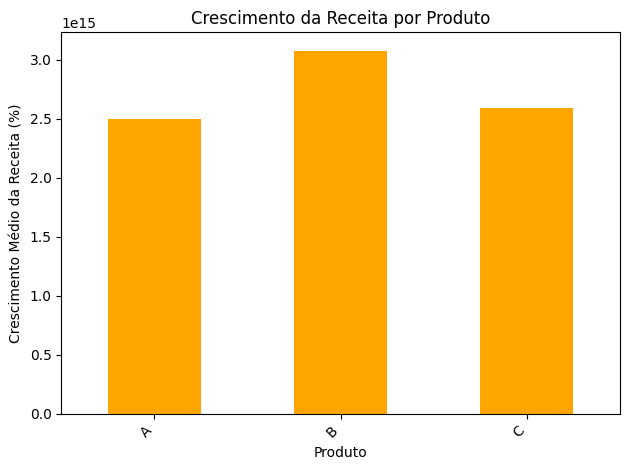

In [ ]:
#razão para a escolha do gráfico:
#permite identificar os produtos com maior e menor crescimento em média.
crescimento_por_produto = df.groupby('Produto')['Crescimento'].mean()
crescimento_por_produto.plot(kind='bar', color='orange')
plt.xlabel('Produto')
plt.ylabel('Crescimento Médio da Receita (%)')
plt.title('Crescimento da Receita por Produto')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajustar o layout para evitar sobreposição de elementos
plt.show()

Quais os motivadores para o aumento de receita?
Analisando os dados conclui-se que o aumento das receitas são significativos, indicando que os clientes atuais estão gastando mais. Por mais que a receita total do trimestre anterior seja maior do que a do atual.

Forneça um diagnóstico detalhado sobre os motivadores, elencando e ranqueando os principais
1.	Clientes novos apresentaram um percentual significativo no aumento da receita.
O que se mostrou estagnado no trimestre anterior.
2.	E os clientes já existentes também apresentaram aumento na produção de receita no trimestre atual.

Sugira uma estratégia para aumentar ainda mais o crescimento no próximo trimestre.
1.	Elaborar programas de fidelidade, oferecer descontos para compras recorrentes e criar campanhas de marketing segmentadas para clientes existentes.
2.	Investir em marketing para atrair novos clientes. Oferecer promoções e incentivos para a primeira compra.
3.	Identificar os produtos com maior procura e investir em marketing mais suas vendas.
4.	Realizar pesquisas de mercado para entender as necessidades dos clientes e desenvolver novos produtos.

Quais seriam seus próximos passos na análise?
1.	Análisar a receita por cliente ao longo do tempo, identificando clientes com maior potencial de crescimento e personalizar as estratégias de marketing voltada para os mesmos.
2.	Análisar a segmentação de clientes por características comportamentais e de consumo para personalizar as estratégias de marketing e vendas.
3.	Análise de mercado para entender as tendências do mercado e as necessidades dos clientes.

